
# Project: Investigate a Dataset (noshowappointments-kagglev2-may-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I have choosen this data set because there are lots of data analysis procedures, and there are many question could be asked here,<dl> 
Like:<dl>
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<dl>
>How many days are enough to tell the patients their appointment and they probably showed up?<dl>
>Who are more probably to attend in their appointment males or females?<dl> 
>Who are more probably to attend in their appointment young or old people?<dl>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [4]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


1- There is no Nulls.<dl>
2- It would be better, if the type of ['scolarship', 'Hioertension', 'Diabetes', 'Alcojolism', 'Handcap', 'SMS_received', 'No_show'] to boolean.<dl>
3-ScheduledDay and AppointmentDay need to be in a datetime form and we need only the day.<dl>
4-NO-show columns needs to renamed to showed and fillped its values to get the same meaning.<dl>
5-Handcap shell corrected to Handicap.<dl>
6-Its better to make all the columns in the lowercase.


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


7-Age has a min of (-1)!<dl>
8-Handcap has max of (4)

In [7]:
#finding if there a duplicated rows
df.duplicated().value_counts()

False    110527
dtype: int64



### Data Cleaning (Taking actions in the previous observations)

In [8]:
#Counting the ages less than or equels to zero
len(df.query('Age <= 0'))

3540

In [9]:
# Drop all the negative and zero age values
df.drop(df.index[df.query('Age <= 0').index.tolist()], inplace=True) 
#check the min age
df.Age.min()

1

In [10]:
#Make columns name lower case
df.columns = df.columns.str.lower()
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
#Renaming no_show to showed_up & ahndcap to hanicap
df.rename(columns={'no-show':'showed_up'}, inplace=True)
df.rename(columns= {'handcap' : 'handicap'}, inplace=True)

In [12]:
#changing the values of showed_up to make sense
df.showed_up.value_counts()

No     85307
Yes    21680
Name: showed_up, dtype: int64

In [13]:
df.showed_up = df.showed_up.map({'NO':True, 'Yes':False}).astype(bool)
df.showed_up.value_counts() #check for the counts of True(must euals to NO) and False(must equal to Yes)

True     85307
False    21680
Name: showed_up, dtype: int64

In [14]:
#Changing the [0, 1] integers to boolean [True, False] in ['scholarship', 'hipertension', 
#'diabetes', 'alcoholism', 'showed_up, 'sms_received']
columns =  ['scholarship', 'hipertension', 'diabetes', 'alcoholism','sms_received', 'handicap']
for col in columns:
    df[col] = df[col].astype(bool)

In [15]:
#Changing the type of 'scheduledday' and 'appointmentday' to datetime
#Which a numpy array
df.scheduledday = df['scheduledday'].astype('datetime64[ns]')
df.appointmentday = df['appointmentday'].astype('datetime64[ns]')

In [16]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [17]:
#check if the scheduled day is after the appointment day, which doesnt make sense
len(df.query('scheduledday >= appointmentday'))

37159

In [18]:
#Drop the rows of scheduled day comes after the appointment day
df = df.query('scheduledday < appointmentday')
len(df.query('scheduledday >= appointmentday'))

0

In [19]:
#Adding a new columns that contains the difference between scheduledday and appointmentday aclled 'time_margin'
df['time_margin'] = df['appointmentday'] - df['scheduledday']
df['time_margin'] = df['time_margin'].astype('timedelta64[D]').astype(int)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,showed_up,time_margin
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,True,1


lets seperate the data into two dataframes depending on showed_up column

In [20]:
#getting showed patients as a seperate dataframe
showed_df = df.query('showed_up == True')
# drop the showed_up columns which has no meanig now
showed_df = showed_df.drop('showed_up',axis='columns') 
showed_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,time_margin
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,1
12,5.666548e+14,5634718,F,2016-04-28 11:33:51,2016-04-29,22,NOVA PALESTINA,True,False,False,False,False,False,0
13,9.113946e+14,5636249,M,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,False,False,False,False,False,False,0


In [21]:
#getting not showed as a seperate dataframe
not_showed_df = df.query('showed_up == False')
# drop the showed_up columns which has no meanig now
not_showed_df = not_showed_df.drop('showed_up',axis='columns')
not_showed_df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,time_margin
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,1
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,False,False,False,False,False,True,2
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,True,False,False,False,False,False,0
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,False,False,False,False,False,False,1


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

**1- Gender**

In [22]:
#getting the percentages of showed up for Males and Females from the whole dataset
per_of_showed_females = len(showed_df.query('gender == "F"')) /len(df.query('gender == "F"')) *100
per_of_showed_males = len(showed_df.query('gender == "M"')) /len(df.query('gender == "F"')) *100

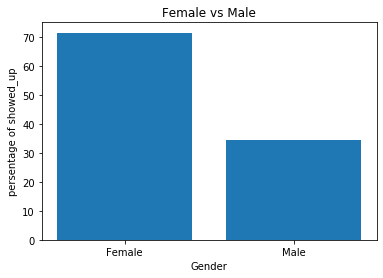

In [23]:
plt.bar(["Female", "Male"], [per_of_showed_females, per_of_showed_males])
plt.title("Female vs Male")
plt.xlabel("Gender")
plt.ylabel("persentage of showed_up");

It seems like if the patient was a female its more likely to showed up by about 40%<dl>

**2- Scholarship**

In [24]:
#getting the percentages of showed up with a scholarshid from the whole dataset
per_of_showed_scholers = len(showed_df.query('scholarship == True')) /len(df) *100
per_of_showed_not_scholers = len(showed_df.query('scholarship == False')) /len(df) *100
per_of_not_showed_scholers = len(not_showed_df.query('scholarship == True')) /len(df) *100
per_of_not_showed_not_scholers = len(not_showed_df.query('scholarship == False')) /len(df) *100

print(per_of_showed_scholers,per_of_showed_not_scholers)
print(per_of_not_showed_scholers, per_of_not_showed_not_scholers)

6.183765824597582 65.2689465543908
3.3310419888869793 25.21624563212465


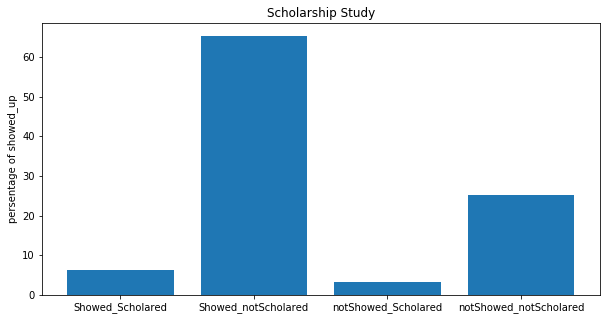

In [25]:
plt.subplots(figsize=(10,5))
plt.bar(['Showed_Scholared', 'Showed_notScholared', 'notShowed_Scholared', 'notShowed_notScholared' ], [per_of_showed_scholers, per_of_showed_not_scholers, per_of_not_showed_scholers, per_of_not_showed_not_scholers])
plt.title("Scholarship Study")
plt.ylabel("persentage of showed_up");

it seems like not schorarshiped petients are extremely more likely to show up for scheduled appointment

**3- Hipertension, Alcoholism, Handicap, Diabetes**

In [26]:
#percentage of patients that have hipertension and showed up from hipertensioned patients only
Hipertension = len(showed_df.query('hipertension == True')) /len(df.query('hipertension == True')) *100
Alcoholism = len(showed_df.query('alcoholism == True')) /len(df.query('alcoholism == True')) *100
Handicap = len(showed_df.query('handicap == True')) /len(df.query('handicap == True')) *100
Diabetes = len(showed_df.query('diabetes == True')) /len(df.query('diabetes == True')) *100
print(Hipertension, Diabetes, Handicap, Alcoholism)

76.47684938797232 75.04184489492282 74.44529456771232 65.91657519209659


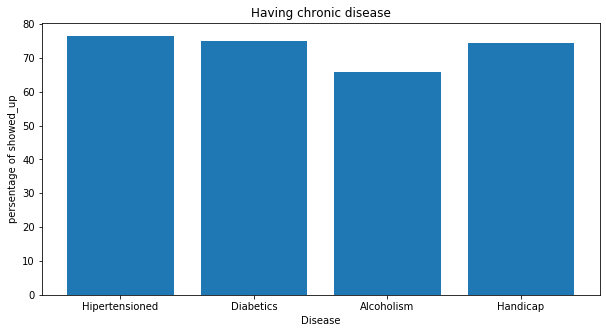

In [27]:
plt.subplots(figsize=(10,5))
plt.bar(["Hipertensioned", "Diabetics","Alcoholism","Handicap" ], [Hipertension, Diabetes, Alcoholism, Handicap])
plt.title("Having chronic disease")
plt.xlabel("Disease")
plt.ylabel("persentage of showed_up");

It seems like if the patient has a chronic disease  or its 75% likely to showed up for scheduled appointment

**4- Neighbourhood**

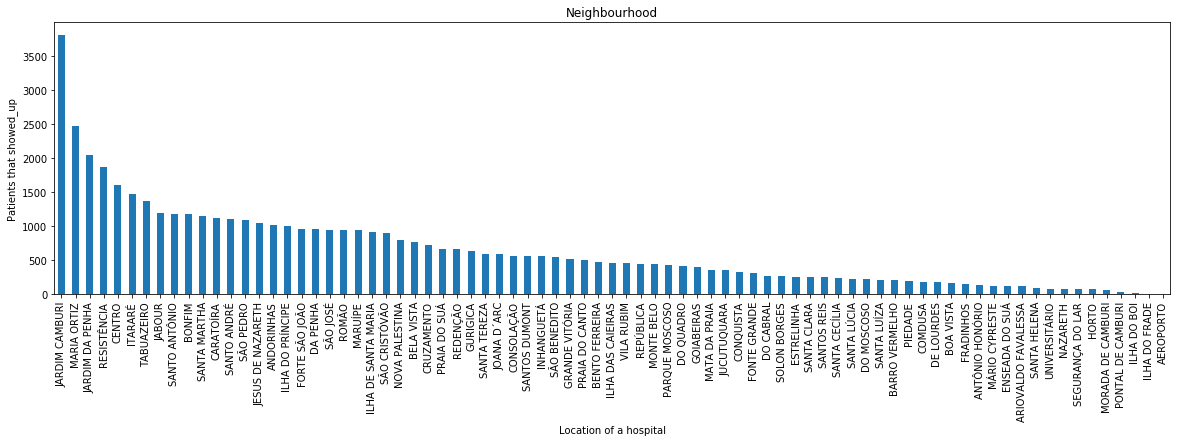

In [28]:
showed_df['neighbourhood'].value_counts().plot(kind = 'bar',figsize = (20,5))
plt.title("Neighbourhood")
plt.xlabel("Location of a hospital")
plt.ylabel("Patients that showed_up");

In [29]:
#The top five locations 
Most_showed_up_loctions = np.array([])
for i in range(5):
    Most_showed_up_loctions = np.append(Most_showed_up_loctions,showed_df['neighbourhood'].value_counts().keys()[i])
Most_showed_up_loctions

array(['JARDIM CAMBURI', 'MARIA ORTIZ', 'JARDIM DA PENHA', 'RESISTÊNCIA',
       'CENTRO'], dtype='<U32')

The top five locations of hospitals the have showed up patients are ['JARDIM CAMBURI', 'MARIA ORTIZ', 'JARDIM DA PENHA', 'RESISTÊNCIA',
       'CENTRO'].

**5- Age**

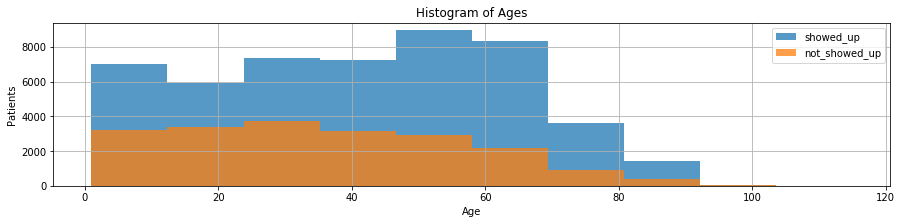

In [30]:
showed_df.age.hist(figsize=(15,3), alpha = 0.75, label='showed_up')
not_showed_df.age.hist(figsize=(15,3), alpha = 0.75, label='not_showed_up')
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Patients")
plt.legend();

Showed_up has the peak at age between [50: 70]

Not_showed_up has the peak at age between [23: 28] 

**6- SMS Receiption**

In [31]:
recived_showed = len(showed_df.query('sms_received == True')) 
not_recived_showed = len(showed_df.query('sms_received == False')) 
recived_not_showed = len(not_showed_df.query('sms_received == True')) 
not_recived_not_showed = len(not_showed_df.query('sms_received == False')) 
print(recived_showed, not_recived_showed, recived_not_showed, not_recived_not_showed)

25017 24877 9568 10366


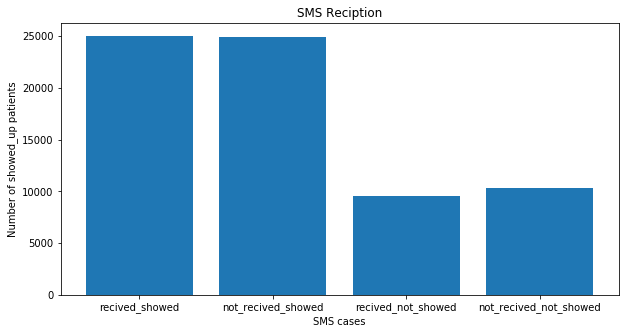

In [32]:
plt.subplots(figsize=(10,5))
plt.bar(['recived_showed', 'not_recived_showed', 'recived_not_showed', 'not_recived_not_showed' ], [recived_showed, not_recived_showed, recived_not_showed, not_recived_not_showed])
plt.title("SMS Reciption")
plt.xlabel("SMS cases")
plt.ylabel("Number of showed_up patients");

It seems like SMS receiption not a critical factor for predict whether a patient will show up for their scheduled appointmen or not

**7- Time Margin**

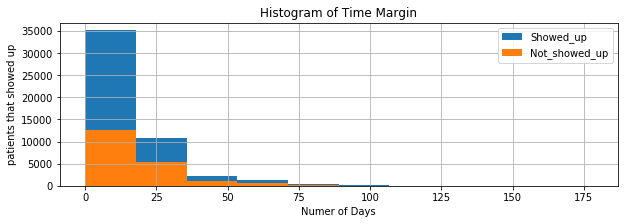

In [33]:
showed_df.time_margin.hist(figsize=(10,3), label='Showed_up')
not_showed_df.time_margin.hist(figsize=(10,3), label='Not_showed_up')
plt.title("Histogram of Time Margin")
plt.xlabel("Numer of Days")
plt.ylabel("patients that showed up")
plt.legend();

It seams like that, the two cases have the same distribution

### Research Question 2  
What is the percentage of A female from JARDIM CAMBURI has a hipertension or diabetes and not_scholarshiped ?

In [34]:
#calculating number of patients that satisfy the conditions and showed up
number_showed = len(showed_df.query('gender=="F" and neighbourhood== "JARDIM CAMBURI" and hipertension==True and diabetes == True and scholarship==False')) 
number_showed

81

In [35]:
#calculating number of patients that satisfy the conditions and not showed up
number_not_showed = len(not_showed_df.query('gender=="F" and neighbourhood== "JARDIM CAMBURI" and hipertension==True and diabetes == True and scholarship==False')) 
number_not_showed

20

It has the percentage of 80% of females from JARDIM CAMBURI have a hipertension or diabetes ant not_scholarshiped to showed up for the appointment

### Research Question 3 
What is the best time margin for a man that recieved a SMS and not_scholarshiped to show up?

In [36]:
#Appling the question filters tothe showed_df dataframe
filtered_df = showed_df.query('gender=="M" and sms_received==True and scholarship==False')
filtered_df.time_margin.describe()

count    7497.000000
mean       17.233560
std        16.252297
min         2.000000
25%         5.000000
50%        12.000000
75%        25.000000
max       168.000000
Name: time_margin, dtype: float64

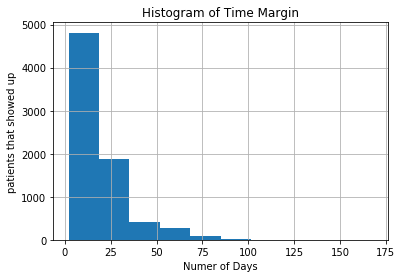

In [37]:
filtered_df.time_margin.hist()
plt.title("Histogram of Time Margin")
plt.xlabel("Numer of Days")
plt.ylabel("patients that showed up");

In [38]:
#probaibility of the time margin less than 25 days.
pro = len(filtered_df.query('time_margin <=25')) / len(filtered_df)*100
pro

75.05668934240363

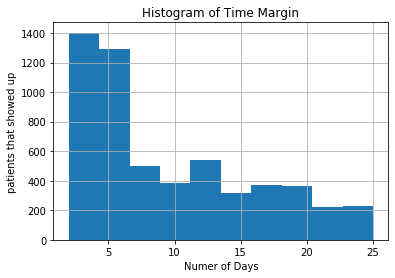

In [39]:
#drop the 25% of data that have more than 25 days as time margin
filtered_df = filtered_df[filtered_df['time_margin'] <= 25]
filtered_df.time_margin.hist()
plt.title("Histogram of Time Margin")
plt.xlabel("Numer of Days")
plt.ylabel("patients that showed up");

In [40]:
filtered_df.time_margin.describe()

count    5627.000000
mean        9.657899
std         6.417355
min         2.000000
25%         5.000000
50%         7.000000
75%        14.000000
max        25.000000
Name: time_margin, dtype: float64

In [41]:
filtered_df.time_margin.value_counts().head()

3     741
6     665
5     625
4     462
13    343
Name: time_margin, dtype: int64

In [42]:
#percentage of time margin of [3:5]
per = len(filtered_df.query('3<time_margin>5')) /len(filtered_df) *100
per

63.977252532432914

It seems like a time margin of 3 to 5 days is good to show up for the appointment

# Limitations
1- The data provied in the dataset is not sufficient to answer all the questions,<dl>
    a- It doesnot tell us anything about the illness like the degree of criticality<dl>
    b- Can not get whether the appointment is a visit or a revisit (may the patient gets well, and donot neeed to revisit the docort)<dl>
2- The size of the dataset is sufficient to give a good judgment, as the samples of different factors is not equeled, and if we trimed the dateset to fix all factored, may it comes to few rows data set with no benefit.

<a id='conclusions'></a>
## Conclusions
1-It seems like if the patient was a female its more likely to showed up by about 40%.<dl>
2-It seems like not schorarshiped petients are extremely more likely to show up for scheduled appointment.<dl>
3-It seems like if the patient has a chronic disease  or its 75% likely to showed up for scheduled appointment<dl>
4-The top five locations of hospitals the have showed up patients are ['JARDIM CAMBURI', 'MARIA ORTIZ', 'JARDIM DA PENHA', 'RESISTÊNCIA','CENTRO'].<dl>
5-The most showed up patients of age[50:70].<dl>
6-The most not showed up patients of age[23:28]<dl>
7-It seems like SMS receiption not a critical factor for predict whether a patient will show up for their scheduled appointmen or not<dl>
8-It seams like, a time margin less than 15 days is more likely to showed up for the appointment<dl>
